## Final Project Proposal and Dataset

- Problem Statement : To predict wine quality based on physicochemical properties
- Dataset : White wine samples based on physicochemical tests
- Dataset Source : https://archive.ics.uci.edu/ml/datasets/wine+quality
- Dataset Characteristics:  
        Multivariate
        Number of Instances: 4898
        Number of Attributes: 12 [1 input variables and 1 output variable]
        Missing value: No

### Import libraries and modules

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Display plots in-notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Load data from csv

In [34]:
whitecsv  = "./data/winequality-white.csv"
white = pd.read_csv(whitecsv,sep=';')
white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### EDA Analysis

In [7]:
# 4898 observations, 12 columns (the 11 features & 1 response)
def eda_source_data(df):
    print("Descriptive Statistics on dataset")
    #print(type(df))
    print(df.shape)
    print(df.index)
    #print(df.columns)
    #print(df.dtypes)
    print(df.info())
    
eda_source_data(white)

Descriptive Statistics on dataset
(4898, 12)
RangeIndex(start=0, stop=4898, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [8]:
# Verify the basic stats look appropriate
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
# There is no missing values in dataset
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

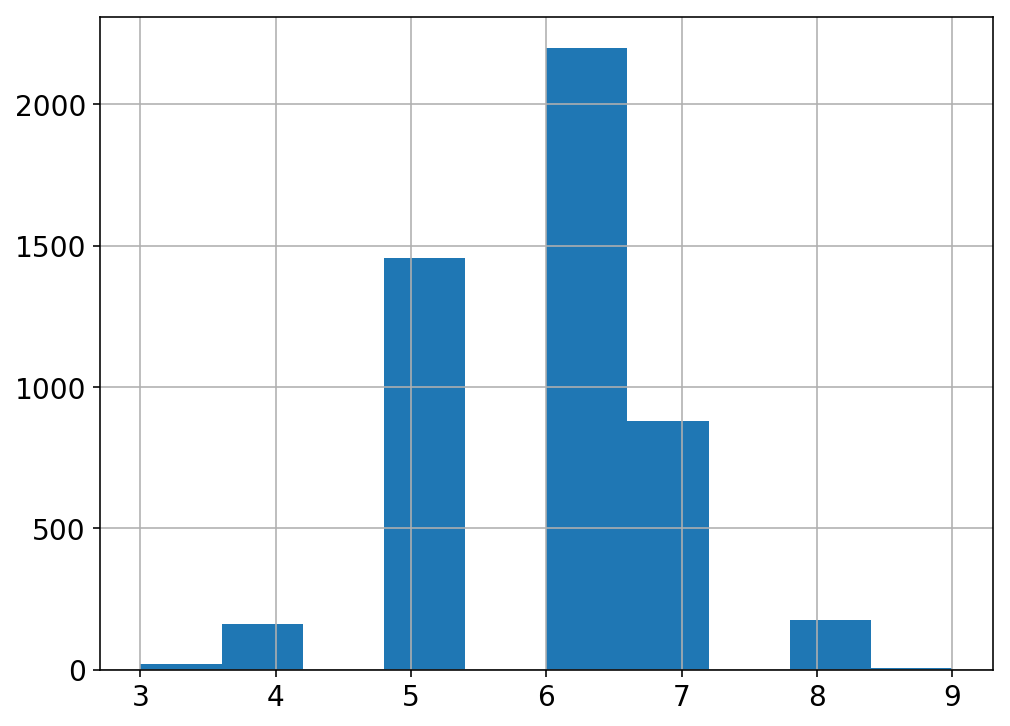

In [10]:
# To identify target variable distribution. There is more than two binary classes, so it's a multivariate classes problem.
white.quality.hist()

In [11]:
# The dataset has imbalance classes
white.quality.value_counts()  

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
# To identify standard variation for target variable
white['quality'].std()

0.8856385749678454

In [13]:
# To identify features correlation
white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


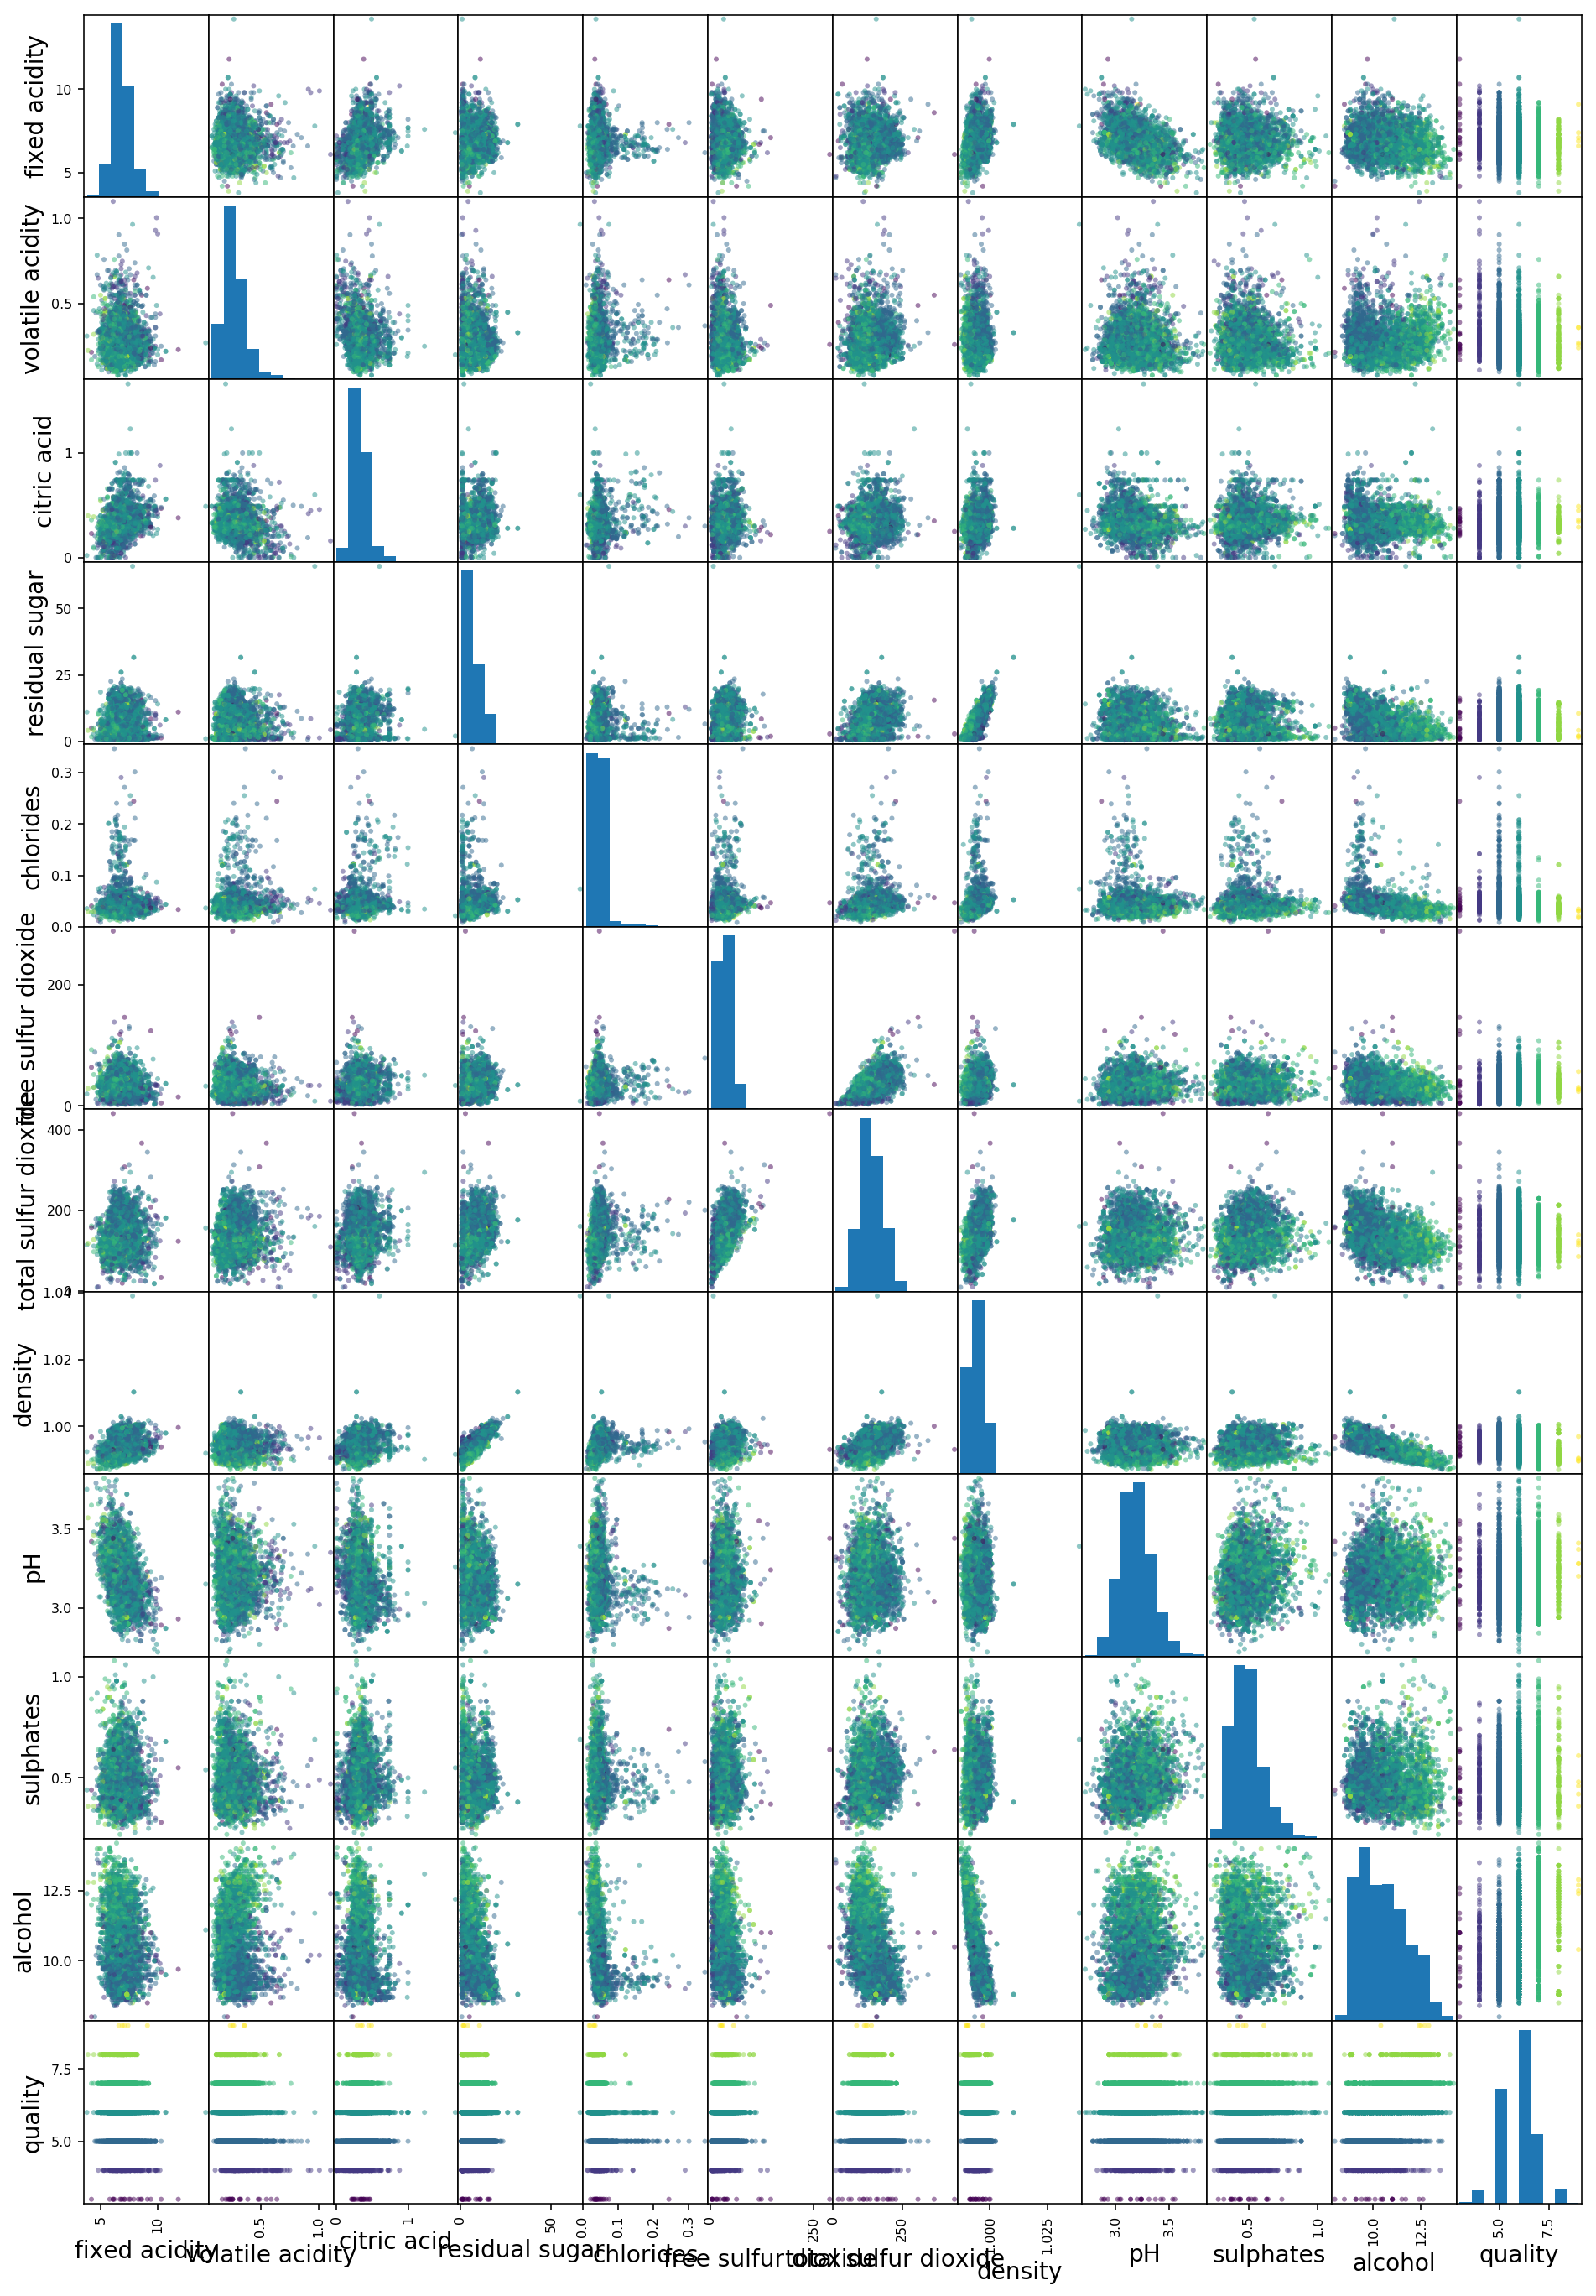

In [35]:
# Scatter matrix of all features, colored by species.
# pd.plotting.scatter_matrix(white.drop('quality', axis=1), c=white.quality, figsize=(16, 24));
pd.plotting.scatter_matrix(white, c=white.quality, figsize=(16, 24));
#sns.pairplot(white.corr());

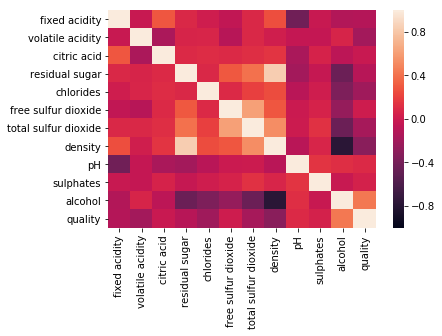

In [12]:
# Heatmap on feature correlation suggest there is higher 
#import seaborn as sns
sns.set_palette("coolwarm", 10)
sns.heatmap(white.corr(), vmin=-1, vmax=1) 

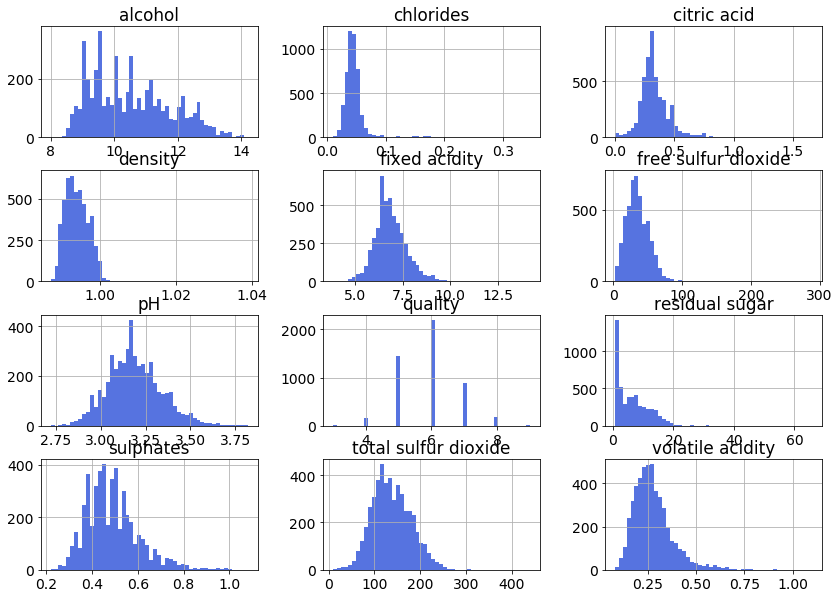

In [108]:
white.hist(figsize=(14, 10), bins=50);

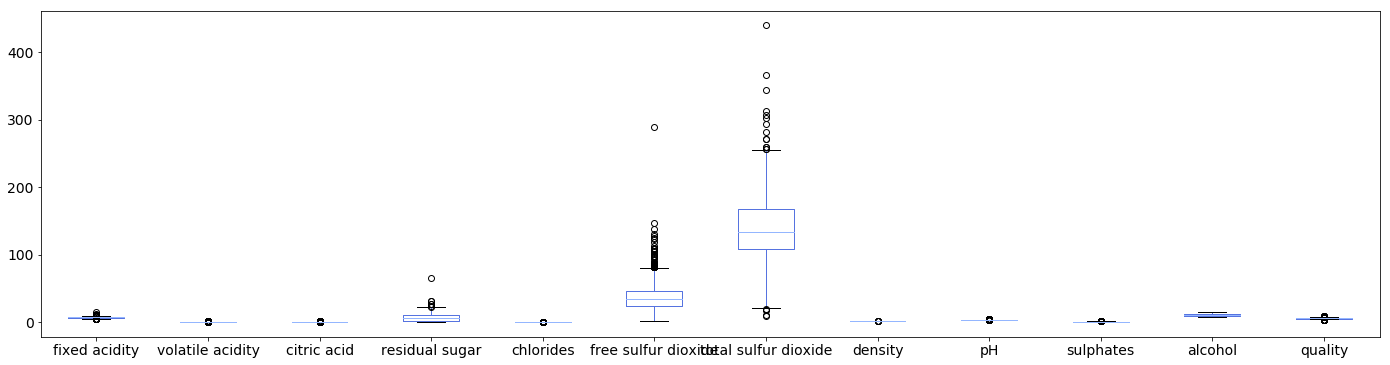

In [100]:
# Plotting all histograms can be unweildly, boxplots can be more concise
white.plot.box(figsize=(24,6));

### Handle Imbalance Classes

In [36]:
# the dataset has imbalance classes
white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [37]:
# Handle imbalance classes by up-sampling Minority Class
#from sklearn.utils import resample

# Separate majority and minority classes
df_majority = white[white.quality==6]
df_minority = white[white.quality==5]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2198,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.quality.value_counts()

6    2198
5    2198
Name: quality, dtype: int64

In [38]:
# Separate majority and minority classes
df_majority = white[white.quality==6]
df_minority = white[white.quality==7]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2198,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])

df_upsampled.quality.value_counts()

7    2198
6    2198
5    2198
Name: quality, dtype: int64

In [39]:
# Separate majority and minority classes
df_majority = white[white.quality==6]
df_minority = white[white.quality==8]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2198,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])

df_upsampled.quality.value_counts()

7    2198
6    2198
5    2198
8    2198
Name: quality, dtype: int64

In [40]:
# Separate majority and minority classes
df_majority = white[white.quality==6]
df_minority = white[white.quality==4]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2198,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])

df_upsampled.quality.value_counts()

7    2198
6    2198
5    2198
4    2198
8    2198
Name: quality, dtype: int64

In [41]:
# Separate majority and minority classes
df_majority = white[white.quality==6]
df_minority = white[white.quality==3]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2198,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])

df_upsampled.quality.value_counts()

7    2198
6    2198
5    2198
4    2198
3    2198
8    2198
Name: quality, dtype: int64

In [42]:
# Separate majority and minority classes
df_majority = white[white.quality==6]
df_minority = white[white.quality==9]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2198,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_upsampled, df_minority_upsampled])

df_upsampled.quality.value_counts()

7    2198
6    2198
5    2198
4    2198
3    2198
9    2198
8    2198
Name: quality, dtype: int64

### Calculate the baseline accuracy

In [43]:
# The model should has accuracy score > 0.448755 accuracy of the majority class
white.quality.value_counts()/white.quality.count()

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

### Split data into training and test sets

In [44]:
# Separate input features (X) and target variable (y)
y = df_upsampled.quality
X = df_upsampled.drop('quality', axis=1)

# Use a cross validation technique to split dataset into Test Set = 20% and Train Set = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [45]:
#data preprocessing steps
#Instantiate and fit StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Train model
lr = LogisticRegression()
# Fit model to train set
lr.fit(X_train, y_train)
# Check test score
lr.score(X_test, y_test)

0.4866796621182586

In [47]:
# Predict on test set
y_pred = lr.predict(X_test)

# Is our model still predicting just one class? There are total of 7 classes = Multivariate
print( np.unique( y_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, y_pred) )

#sns.jointplot(y_test, y_pred);

[3 4 5 6 7 8 9]
0.4866796621182586


In [48]:
# use predict_proba to find out probabilities
lr.predict_proba(X_test)

array([[1.25521549e-01, 7.34288580e-02, 3.33983324e-01, ...,
        1.22587278e-01, 9.47442650e-02, 2.34662694e-10],
       [5.98835697e-01, 1.56030264e-03, 4.06502530e-02, ...,
        8.70767444e-02, 1.09989719e-01, 8.76007117e-02],
       [7.50121489e-01, 1.59817927e-05, 3.63202863e-02, ...,
        4.79643288e-02, 1.11775182e-01, 1.79880694e-03],
       ...,
       [1.12013897e-01, 9.60751061e-02, 9.02357170e-02, ...,
        2.79113446e-01, 1.72326858e-01, 4.81285756e-02],
       [2.92996263e-02, 6.96531115e-02, 6.10878023e-02, ...,
        1.54473019e-01, 1.38361252e-01, 4.26064907e-01],
       [7.87235916e-03, 2.35052691e-02, 2.94067287e-02, ...,
        3.01854701e-01, 3.64442711e-01, 1.42409486e-01]])

In [49]:
# Probabilities of each class all add up to 1
for a,b,c,d,e,f,g in lr.predict_proba(X_test):
    print(sum([a,b,c,d,e,f,g]))

0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0000000000000002
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999997
1.0
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0000000000000002
1.0
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.000000000000000

1.0000000000000002
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999998
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0000000000000002
1.0
0.9999999999999998
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
1.0
0.9999999999999998
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.000

In [50]:
# Get probability predictions.
#logit_pred_proba = lr.predict_proba(X_test)[:,1]

In [51]:
# confusion matrix of predictions on our test 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,4,5,6,7,8,9,All
True,,,,,,,,
3,198,38,19,59,0,46,80,440
4,53,265,67,20,16,18,0,439
5,53,100,207,37,21,20,2,440
6,49,40,113,71,69,89,8,439
7,44,21,41,31,111,175,17,440
8,21,17,40,27,96,206,33,440
9,0,0,0,0,0,0,440,440
All,418,481,487,245,313,554,580,3078


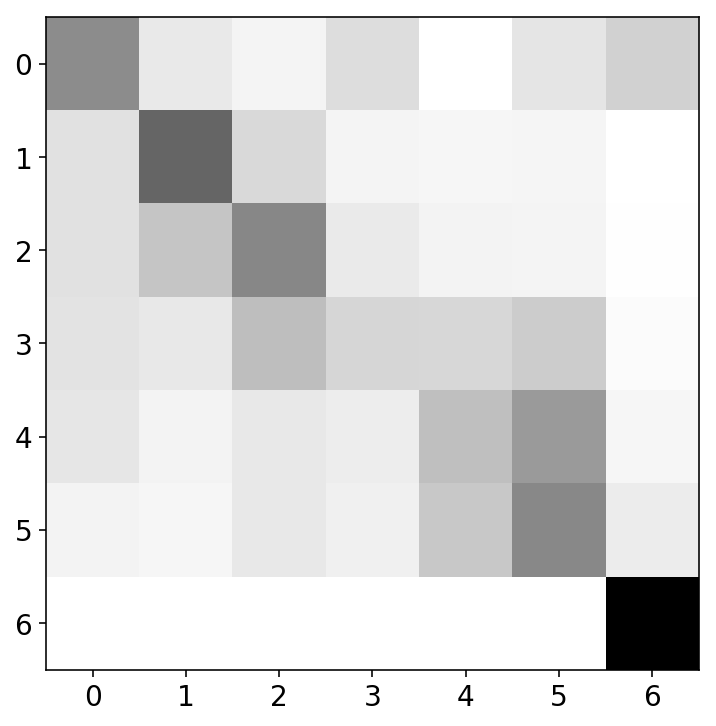

In [52]:
conf = metrics.confusion_matrix(y_test,y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [53]:
# Classification Reports/Matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.47      0.45      0.46       440
          4       0.55      0.60      0.58       439
          5       0.43      0.47      0.45       440
          6       0.29      0.16      0.21       439
          7       0.35      0.25      0.29       440
          8       0.37      0.47      0.41       440
          9       0.76      1.00      0.86       440

avg / total       0.46      0.49      0.47      3078



### One Vs. Rest Classifier

In [54]:
from sklearn.multiclass import OneVsRestClassifier
LR = LogisticRegression()
OVC = OneVsRestClassifier(LR)
OVC.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [55]:
# Check test score
OVC.score(X_test, y_test)

0.4866796621182586

In [56]:
# use predict_proba to find out probabilities
OVC.predict_proba(X_test)

array([[1.25521549e-01, 7.34288580e-02, 3.33983324e-01, ...,
        1.22587278e-01, 9.47442650e-02, 2.34662662e-10],
       [5.98835698e-01, 1.56030265e-03, 4.06502531e-02, ...,
        8.70767446e-02, 1.09989719e-01, 8.76007097e-02],
       [7.50121489e-01, 1.59817927e-05, 3.63202863e-02, ...,
        4.79643288e-02, 1.11775182e-01, 1.79880707e-03],
       ...,
       [1.12013898e-01, 9.60751065e-02, 9.02357174e-02, ...,
        2.79113447e-01, 1.72326859e-01, 4.81285714e-02],
       [2.92996266e-02, 6.96531122e-02, 6.10878029e-02, ...,
        1.54473020e-01, 1.38361253e-01, 4.26064901e-01],
       [7.87235917e-03, 2.35052691e-02, 2.94067287e-02, ...,
        3.01854702e-01, 3.64442711e-01, 1.42409484e-01]])

In [57]:
# Probabilities of each class all add up to 1
for a,b,c,d,e,f,g in OVC.predict_proba(X_test):
    print(sum([a,b,c,d,e,f,g]))

1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9999999999999998
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0000000000000004
1.0000000000000002
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
1.0000000000000002
0.9999999999999998
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0000000000000

1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
0.9999999999999998
1.0000000000000002
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0000000000000002
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999996
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999998
1.0000000000000002
0.9999999999999997
1.0
1.0000000000000002
1.0000000000000002
1.0
0.99

In [58]:
# Model predict
y_pred = OVC.predict(X_test)

In [59]:
# How's our accuracy?
print( accuracy_score(y_test, y_pred) )

0.4866796621182586


In [60]:
# Confustion matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,4,5,6,7,8,9,All
True,,,,,,,,
3,198,38,19,59,0,46,80,440
4,53,265,67,20,16,18,0,439
5,53,100,207,37,21,20,2,440
6,49,40,113,71,69,89,8,439
7,44,21,41,31,111,175,17,440
8,21,17,40,27,96,206,33,440
9,0,0,0,0,0,0,440,440
All,418,481,487,245,313,554,580,3078


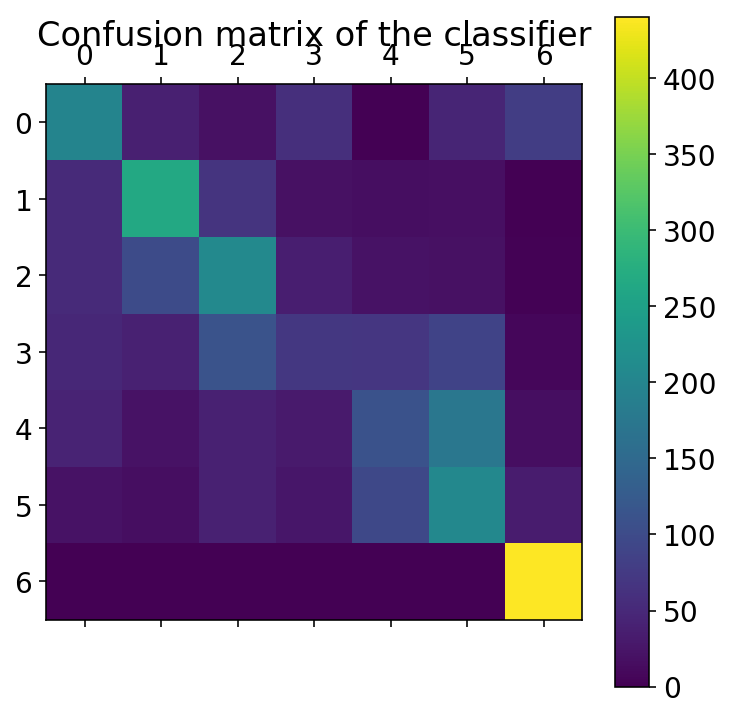

In [61]:
# Confution matrix
import pylab as pl
cm =metrics.confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [62]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.47      0.45      0.46       440
          4       0.55      0.60      0.58       439
          5       0.43      0.47      0.45       440
          6       0.29      0.16      0.21       439
          7       0.35      0.25      0.29       440
          8       0.37      0.47      0.41       440
          9       0.76      1.00      0.86       440

avg / total       0.46      0.49      0.47      3078



### One Vs. One Classifier

In [63]:
from sklearn.multiclass import OneVsOneClassifier
LR = LogisticRegression()
OVO = OneVsOneClassifier(LR)
OVO.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [64]:
# Check test score
OVC.score(X_test, y_test)

0.4866796621182586

In [65]:
# Model predict
y_pred = OVO.predict(X_test)

In [66]:
# OVO has highest accuracy compare to based and OVR
print( accuracy_score(y_test, y_pred) )

0.5129954515919428


In [67]:
# Confustion matrix
# metrics.confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,4,5,6,7,8,9,All
True,,,,,,,,
3,267,38,19,59,28,29,0,440
4,48,226,79,45,30,11,0,439
5,54,92,208,53,17,16,0,440
6,53,30,111,96,83,62,4,439
7,44,18,35,47,123,166,7,440
8,32,7,40,20,108,219,14,440
9,0,0,0,0,0,0,440,440
All,498,411,492,320,389,503,465,3078


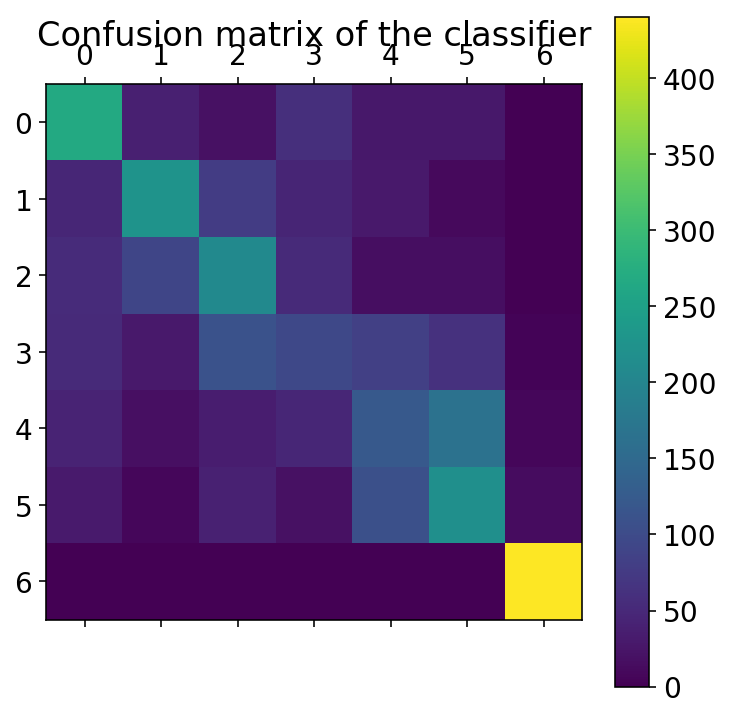

In [68]:
# Confution matrix
import pylab as pl
cm =metrics.confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [69]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          3       0.54      0.61      0.57       440
          4       0.55      0.51      0.53       439
          5       0.42      0.47      0.45       440
          6       0.30      0.22      0.25       439
          7       0.32      0.28      0.30       440
          8       0.44      0.50      0.46       440
          9       0.95      1.00      0.97       440

avg / total       0.50      0.51      0.50      3078



### Check for overfitting

In [70]:
# Use a cross validation technique to split dataset into Test Set = 30% and Train Set = 70%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=123, 
                                                    stratify=y)

In [71]:
#data preprocessing steps
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [72]:
# Fit model
OVO.fit(X1_train,y1_train)
# Check test score
lr.score(X1_test, y1_test)

0.4800693240901213

In [73]:
y1_pred = OVO.predict(X1_test)

In [74]:
# Not much different in accuracy compare to OVO model
print( accuracy_score(y1_test, y1_pred) )

0.5108318890814558


In [80]:
# Confustion matrix
pd.crosstab(y1_test, y1_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,3,4,5,6,7,8,9,All
True,,,,,,,,
3,391,62,33,78,37,58,0,659
4,68,334,120,73,40,24,0,659
5,71,142,309,83,34,20,1,660
6,77,53,151,150,117,103,8,659
7,59,24,54,72,196,243,11,659
8,53,3,63,35,167,318,21,660
9,0,0,0,0,0,0,660,660
All,719,618,730,491,591,766,701,4616


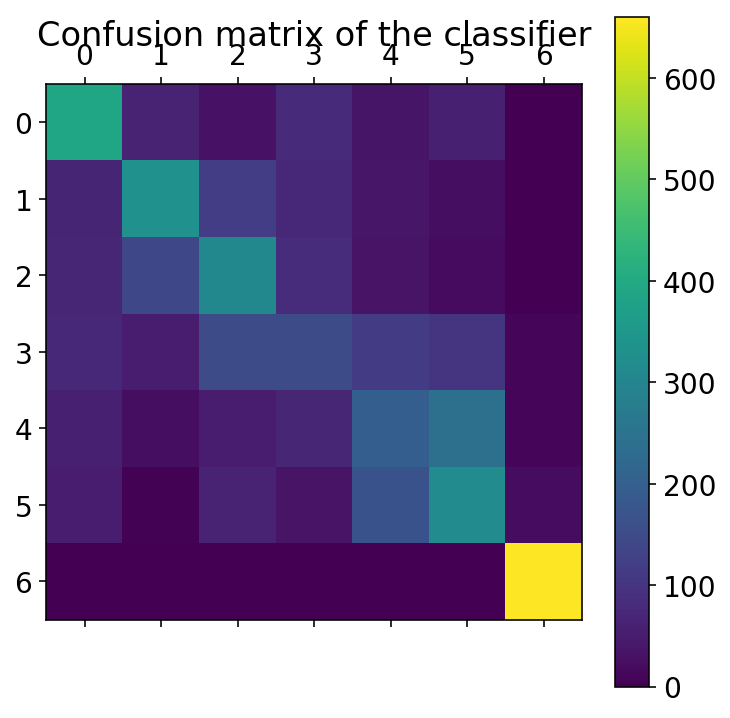

In [76]:
# Confution matrix
import pylab as pl
cm =metrics.confusion_matrix(y1_test, y1_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [79]:
# Classification Report - similar to OVO model
from sklearn.metrics import classification_report

print(classification_report(y1_test, y1_pred))

             precision    recall  f1-score   support

          3       0.54      0.59      0.57       659
          4       0.54      0.51      0.52       659
          5       0.42      0.47      0.44       660
          6       0.31      0.23      0.26       659
          7       0.33      0.30      0.31       659
          8       0.42      0.48      0.45       660
          9       0.94      1.00      0.97       660

avg / total       0.50      0.51      0.50      4616



### Conclusion

#### OVO Model with 20% sample size is chosen for the following reasons:

1. The classification report shows highest precision and recall values for minority class [quality=9].  It has the ability to detect correctly positive samples of the minority class.
2. The accuracy of 0.51 is higher than the baseline accuracy 0.44 based on majority class. The accuracy score is the highest among tested models.
3. The confusion matrix : the diagonal elements show the number of correct classifications for each class.

